In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import zscore

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel(r"D:\Data Scraping\Turo\Nashville\clean data\Q4_only.xlsx")

df

,id,trips_oct2023,average_rating_oct2023,average_price_oct2023,host_id_oct2023,all_star_host_oct2023,favorited_by_searcher_oct2023,new_listing_oct2023,make_oct2023,model_oct2023,type_oct2023,year_oct2023,city_oct2023,lat_oct2023,lng_oct2023,trips_jan2024,average_rating_jan2024,average_price_jan2024,host_id_jan2024,all_star_host_jan2024,favorited_by_searcher_jan2024,new_listing_jan2024,make_jan2024,model_jan2024,type_jan2024,year_jan2024,city_jan2024,lat_jan2024,lng_jan2024,trips_Q4_2023,average_q4_price,price_increase_Q4_2023,rating_increase_Q4_2023
0,1166707,23,4.8947,135.000000,20701948,True,False,False,Tesla,Model 3,CAR,2020,Nashville,36.149514,-86.795311,23,4.8947,142.500000,20701948,False,False,False,Tesla,Model 3,CAR,2020,Nashville,36.149514,-86.795311,0,138.750000,7.500000,0.0000
1,1181948,24,5.0000,156.000000,19456670,True,False,False,Volvo,XC90,SUV,2016,Nashville,36.169430,-86.684413,24,5.0000,136.500000,19456670,True,False,False,Volvo,XC90,SUV,2016,Nashville,36.169430,-86.684413,0,146.250000,-19.500000,0.0000
2,1184361,34,5.0000,78.850000,20701948,True,False,False,Mercedes-Benz,C-Class,CAR,2018,Nashville,36.149514,-86.795311,34,5.0000,80.925000,20701948,False,False,False,Mercedes-Benz,C-Class,CAR,2018,Nashville,36.149514,-86.795311,0,79.887500,2.075000,0.0000
3,1225258,62,4.9038,38.291667,21163516,False,False,False,Nissan,Rogue,SUV,2013,Nashville,36.100476,-86.657206,62,4.9038,33.147143,21163516,False,False,False,Nissan,Rogue,SUV,2013,Nashville,36.100476,-86.657206,0,35.719405,-5.144524,0.0000
4,1499330,11,5.0000,119.325000,19646681,True,False,False,Tesla,Model Y,SUV,2022,Nashville,36.171769,-86.746381,11,5.0000,122.550000,19646681,False,False,False,Tesla,Model Y,SUV,2022,Nashville,36.171769,-86.746381,0,120.937500,3.225000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,1978947,45,4.9730,41.951429,14503335,True,False,False,Volkswagen,Jetta,CAR,2019,Nashville,36.131443,-86.667181,74,4.9692,36.000000,14503335,True,False,False,Volkswagen,Jetta,CAR,2019,Nashville,36.142394,-86.667724,29,38.975714,-5.951429,-0.0038
672,2075197,25,5.0000,58.500000,20866228,True,False,False,Volkswagen,Taos,SUV,2023,Nashville,36.142394,-86.667724,54,4.9444,58.500000,20866228,True,False,False,Volkswagen,Taos,SUV,2023,Nashville,36.142394,-86.667724,29,58.500000,0.000000,-0.0556
673,2139482,14,5.0000,51.000000,14503335,True,False,False,Volkswagen,Tiguan,SUV,2019,Nashville,36.131443,-86.667181,43,5.0000,44.100000,14503335,True,False,False,Volkswagen,Tiguan,SUV,2019,Nashville,36.142394,-86.667724,29,47.550000,-6.900000,0.0000
674,1981120,42,4.8919,38.748571,32331832,True,False,False,Nissan,Altima,CAR,2015,Nashville,36.190714,-86.718627,75,4.9412,33.604286,32331832,True,False,False,Nissan,Altima,CAR,2015,Nashville,36.190714,-86.718627,33,36.176429,-5.144286,0.0493


In [3]:
# change column year to object
df['year_jan2024'] = df['year_jan2024'].astype(object)

In [4]:
# filter for only Nashville
df_nash = df[df['city_jan2024'] == 'Nashville']

In [5]:
# top 15 by make
trips_by_make = df_nash.groupby(by = 'make_jan2024')[['trips_Q4_2023', 'average_q4_price']].mean().reset_index().sort_values(by = 'trips_Q4_2023', ascending = False).head(15)

trips_by_make

,make_jan2024,trips_Q4_2023,average_q4_price
3,Buick,22.500000,43.189183
25,Nissan,17.136364,48.893286
34,Volkswagen,17.000000,55.705020
8,FIAT,16.000000,47.079448
7,Dodge,15.625000,74.298598
13,INFINITI,14.666667,56.008032
16,Kia,13.818182,49.428457
24,Mitsubishi,13.666667,57.616250
22,Mazda,13.400000,57.761192
12,Hyundai,12.521739,57.171072


In [6]:
# top 15 by make
trips_by_make_type = df_nash.groupby(by = ['type_jan2024', 'make_jan2024'])[['trips_Q4_2023', 'average_q4_price']].mean().reset_index().sort_values(by = 'trips_Q4_2023', ascending = False).head(15)

trips_by_make_type

,type_jan2024,make_jan2024,trips_Q4_2023,average_q4_price
35,SUV,Buick,22.500000,43.189183
38,SUV,Dodge,21.333333,57.351667
24,CAR,Volkswagen,17.428571,47.541446
18,CAR,Nissan,17.363636,42.876315
55,SUV,Nissan,17.095238,55.142396
6,CAR,FIAT,17.000000,42.672713
61,SUV,Volkswagen,16.785714,59.786807
49,SUV,Lexus,16.750000,64.401012
33,SUV,Audi,16.500000,86.041250
4,CAR,Chrysler,15.500000,37.281295


In [7]:
# top 15 by make and model
trips_by_make_model_year = df_nash.groupby(by = ['type_jan2024', 'make_jan2024', 'model_jan2024', 'year_jan2024'])[['trips_Q4_2023', 'average_q4_price']].mean().reset_index().sort_values(by = 'trips_Q4_2023', ascending = False).head(50)

trips_by_make_model_year

,type_jan2024,make_jan2024,model_jan2024,year_jan2024,trips_Q4_2023,average_q4_price
102,CAR,Nissan,Altima,2015,33.000000,36.176429
345,SUV,Volkswagen,Tiguan,2019,29.000000,47.550000
249,SUV,Hyundai,Tucson,2017,28.000000,46.800000
107,CAR,Nissan,Maxima,2014,28.000000,42.000000
209,SUV,Dodge,Journey,2020,27.000000,50.765000
17,CAR,Chevrolet,Camaro,2019,26.000000,56.776905
44,CAR,Ford,Focus,2012,26.000000,32.799000
79,CAR,Kia,Optima,2020,24.000000,48.888333
58,CAR,Honda,Civic,2012,24.000000,36.628500
309,SUV,Nissan,Kicks,2019,24.000000,37.049125


<Axes: xlabel='type_jan2024', ylabel='make_jan2024'>

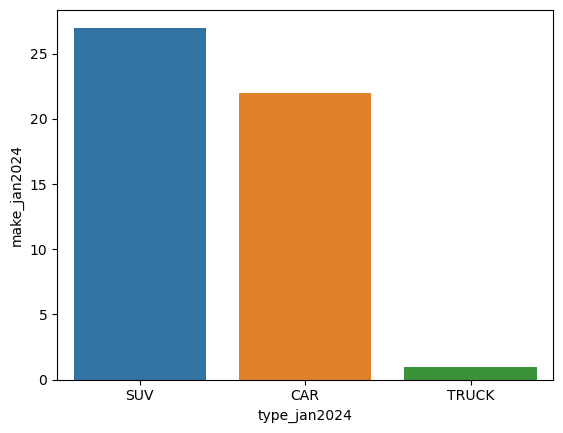

In [8]:
count_type = trips_by_make_model_year.groupby(by = 'type_jan2024').count().reset_index().sort_values(by = 'make_jan2024', ascending = False)

sns.barplot(data = count_type, x = 'type_jan2024', y = 'make_jan2024')

<Axes: xlabel='type_jan2024', ylabel='make_jan2024'>

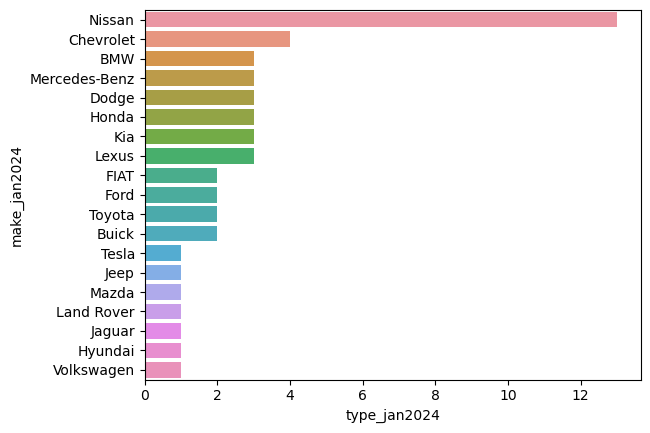

In [9]:
count_make = trips_by_make_model_year.groupby(by = 'make_jan2024').count().reset_index().sort_values(by = 'type_jan2024', ascending = False)

sns.barplot(data = count_make, y = 'make_jan2024', x = 'type_jan2024')

<Axes: xlabel='year_jan2024', ylabel='type_jan2024'>

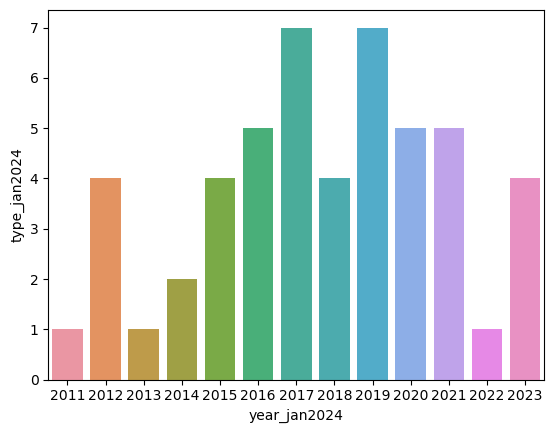

In [10]:
count_year = trips_by_make_model_year.groupby(by = 'year_jan2024').count().reset_index().sort_values(by = 'year_jan2024', ascending = True)

sns.barplot(data = count_year, y = 'type_jan2024', x = 'year_jan2024')

<Axes: xlabel='type_jan2024', ylabel='model_jan2024'>

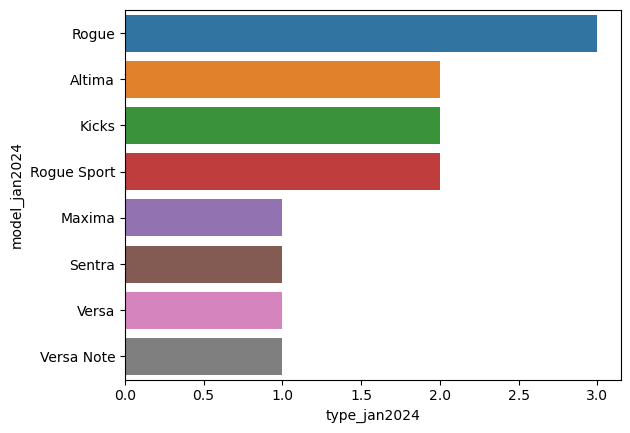

In [11]:
nissan = trips_by_make_model_year[trips_by_make_model_year['make_jan2024'] == 'Nissan']

count_nissan_model = nissan.groupby(by = 'model_jan2024').count().reset_index().sort_values(by = 'year_jan2024', ascending = False)

sns.barplot(data = count_nissan_model, y = 'model_jan2024', x = 'type_jan2024')

<Axes: xlabel='average_q4_price', ylabel='Count'>

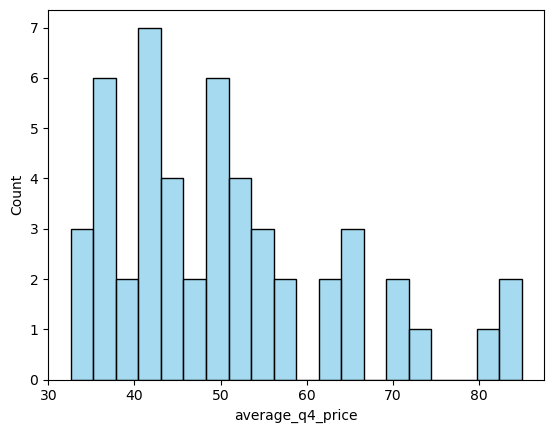

In [12]:
sns.histplot(data = trips_by_make_model_year['average_q4_price'], bins=20, kde=False, color='skyblue', edgecolor='black')

---

# Bad cars 

In [13]:
# bottom 15 by make and model
bottom_make_model_year = df_nash.groupby(by = ['type_jan2024', 'make_jan2024', 'model_jan2024', 'year_jan2024'])[['trips_Q4_2023', 'average_q4_price']].mean().reset_index().sort_values(by = 'trips_Q4_2023', ascending = True).head(50)

bottom_make_model_year

,type_jan2024,make_jan2024,model_jan2024,year_jan2024,trips_Q4_2023,average_q4_price
350,SUV,Volvo,XC90,2016,0.0,146.250000
49,CAR,Ford,Fusion,2019,0.0,40.480833
124,CAR,Porsche,Panamera,2014,0.0,149.000000
119,CAR,Polestar,2,2022,0.0,77.396667
302,SUV,Mercedes-Benz,GLE-Class,2023,0.0,383.262500
314,SUV,Nissan,Rogue,2013,0.0,35.719405
127,CAR,Tesla,Model 3,2020,0.0,138.750000
308,SUV,Nissan,Armada,2018,1.0,138.138333
366,VAN,Ford,Transit Cargo,2016,1.0,250.000000
358,TRUCK,Ford,Ranger,2021,1.0,75.721667


year, price

<Axes: xlabel='average_q4_price', ylabel='Count'>

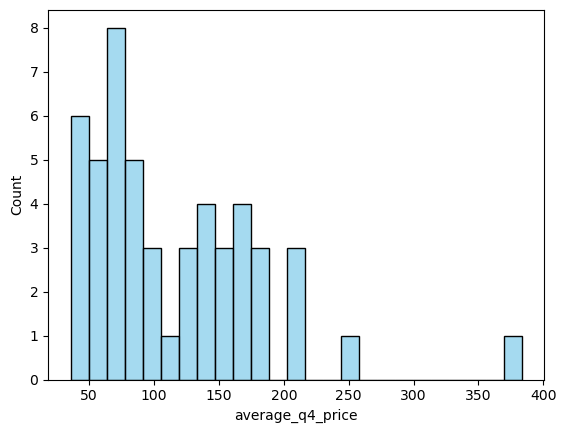

In [14]:
sns.histplot(data = bottom_make_model_year['average_q4_price'], bins=25, kde=False, color='skyblue', edgecolor='black')

<Axes: xlabel='make_jan2024', ylabel='type_jan2024'>

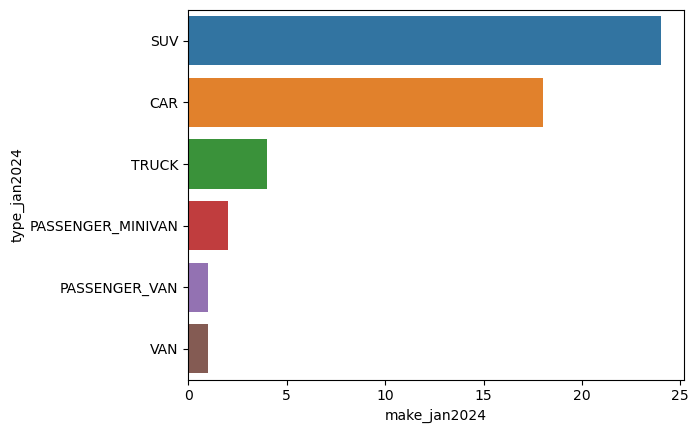

In [15]:
count_type = bottom_make_model_year.groupby(by = 'type_jan2024').count().reset_index().sort_values(by = 'make_jan2024', ascending = False)

sns.barplot(data = count_type, y = 'type_jan2024', x = 'make_jan2024')

In [16]:
bottom_make_model_year['trips_Q4_2023'].mean()

2.18

In [17]:
trips_by_make_model_year['trips_Q4_2023'].mean()

22.35666666666667

<Axes: xlabel='year_jan2024', ylabel='type_jan2024'>

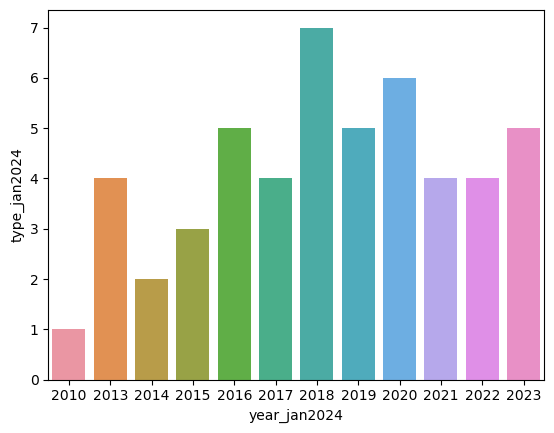

In [18]:
count_year = bottom_make_model_year.groupby(by = 'year_jan2024').count().reset_index().sort_values(by = 'year_jan2024', ascending = True)

sns.barplot(data = count_year, y = 'type_jan2024', x = 'year_jan2024')

# taking a deeper look at nissan

In [19]:
nissan.count()

type_jan2024        13
make_jan2024        13
model_jan2024       13
year_jan2024        13
trips_Q4_2023       13
average_q4_price    13
dtype: int64

In [20]:
nissan = df_nash[df_nash['make_jan2024'] == 'Nissan'][['trips_Q4_2023', 'average_q4_price', 'model_jan2024', 'type_jan2024', 'year_jan2024']].sort_values(by = 'trips_Q4_2023', ascending = False)

nissan

,trips_Q4_2023,average_q4_price,model_jan2024,type_jan2024,year_jan2024
674,33,36.176429,Altima,CAR,2015
670,29,43.527273,Rogue,SUV,2018
668,28,42.000000,Maxima,CAR,2014
665,27,37.546333,Kicks,SUV,2023
664,27,35.712262,Altima,CAR,2019
661,27,51.058333,Rogue,SUV,2019
658,26,43.912500,Versa,CAR,2019
655,25,56.666250,Rogue,SUV,2021
641,24,52.471667,Rogue Sport,SUV,2017
643,24,50.138333,Rogue Sport,SUV,2021


In [21]:
count_nissan = nissan[['model_jan2024', 'trips_Q4_2023', 'average_q4_price']].groupby(by = 'model_jan2024').mean().reset_index().sort_values(by = 'trips_Q4_2023', ascending = False)

count_nissan = count_nissan[count_nissan['trips_Q4_2023'] > 12]

count_nissan

,model_jan2024,trips_Q4_2023,average_q4_price
8,Rogue Sport,22.000,49.803333
2,Kicks,19.500,43.987802
3,Maxima,19.000,44.174375
11,Versa Note,19.000,33.841354
0,Altima,18.125,46.454178
6,Pathfinder,18.000,96.596250
7,Rogue,17.300,50.110543
9,Sentra,17.000,46.208786
10,Versa,15.875,40.399561
4,Murano,14.000,42.289091


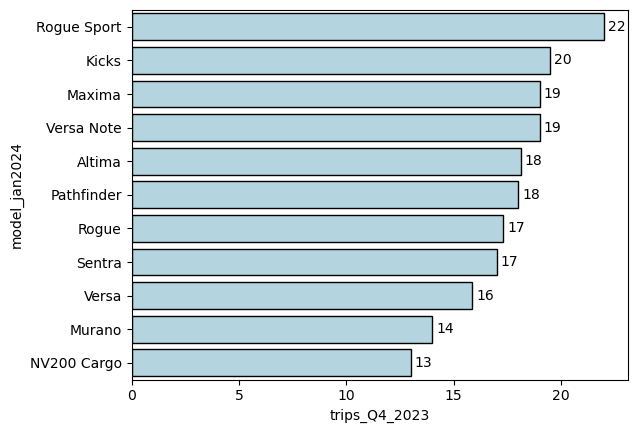

In [22]:
plot = sns.barplot(data = count_nissan, x = 'trips_Q4_2023', y = 'model_jan2024', edgecolor = 'black', color = 'lightblue')

for p in plot.patches:
    plot.annotate(f'{p.get_width():.0f}', 
                (p.get_x() + p.get_width(), 
                 p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(3, 0), 
                textcoords='offset points')

In [23]:
price_nissan = count_nissan.sort_values(by = 'average_q4_price', ascending = False)

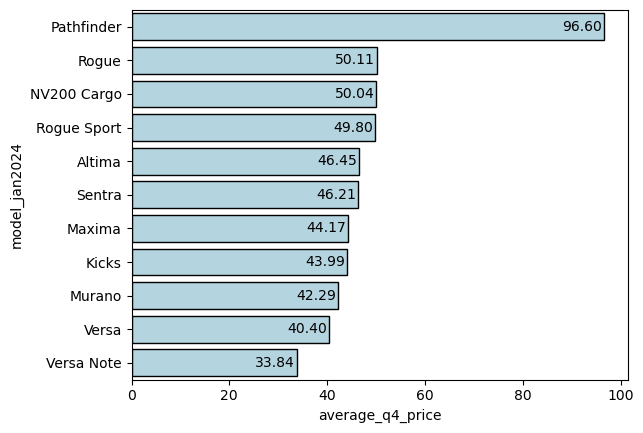

In [24]:
plot = sns.barplot(data = price_nissan, x = 'average_q4_price', y = 'model_jan2024', edgecolor = 'black', color = 'lightblue')

for p in plot.patches:
    plot.annotate(f'{p.get_width():.2f}', 
                (p.get_x() + p.get_width(), 
                 p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(-30, 0), 
                textcoords='offset points')

In [25]:
nissan.groupby(by = 'model_jan2024').count().sort_values(by = 'trips_Q4_2023', ascending = False)

,trips_Q4_2023,average_q4_price,type_jan2024,year_jan2024
model_jan2024,,,,
Rogue,10,10,10,10
Altima,8,8,8,8
Versa,8,8,8,8
Kicks,4,4,4,4
Rogue Sport,3,3,3,3
Maxima,2,2,2,2
Sentra,2,2,2,2
Versa Note,2,2,2,2
Armada,1,1,1,1


In [26]:
count_nissan['trips_zscore'] = zscore(count_nissan['trips_Q4_2023'])
count_nissan['price_zscore'] = zscore(count_nissan['average_q4_price'])
count_nissan['rank'] = count_nissan['trips_zscore'] + count_nissan['price_zscore']

In [27]:
count_nissan.sort_values(by = 'rank', ascending = False)

,model_jan2024,trips_Q4_2023,average_q4_price,trips_zscore,price_zscore,rank
6,Pathfinder,18.000,96.596250,0.194749,3.022100,3.216849
8,Rogue Sport,22.000,49.803333,1.842627,0.022935,1.865562
2,Kicks,19.500,43.987802,0.812703,-0.349809,0.462895
3,Maxima,19.000,44.174375,0.606719,-0.337850,0.268868
0,Altima,18.125,46.454178,0.246245,-0.191728,0.054518
7,Rogue,17.300,50.110543,-0.093629,0.042625,-0.051005
11,Versa Note,19.000,33.841354,0.606719,-1.000139,-0.393421
9,Sentra,17.000,46.208786,-0.217220,-0.207456,-0.424676
10,Versa,15.875,40.399561,-0.680686,-0.579795,-1.260481
5,NV200 Cargo,13.000,50.035333,-1.865098,0.037804,-1.827294
